In [75]:
from pharynx_analysis import (
    pharynx_io as pio, image_processing as ip, 
    experiment, plots, profile_processing, data_analysis
)
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from importlib import reload
from skimage import measure, transform
from collections import namedtuple
import pdb
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import scale
import skimage
import logging
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
import seaborn as sns
from skfda import FDataGrid
import skfda
from statsmodels.stats.weightstats import DescrStatsW
from scipy import signal
import matlab.engine
import matlab
import pandas as pd
from pathlib import Path
import matplotlib

reload(logging)
reload(experiment)
reload(pio)
reload(ip)
reload(plots)
reload(profile_processing)
reload(data_analysis)

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

07:47:03 INFO:Starting full pipeline run for /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47
07:47:03 INFO:Loading Images
07:47:04 INFO:Segmenting pharynxes
07:47:05 INFO:Centering and rotating pharynxes
100%|██████████| 123/123 [00:07<00:00, 15.70it/s]
07:47:14 INFO:Calculating midlines
100%|██████████| 123/123 [00:01<00:00, 114.55it/s]
07:47:15 INFO:Measuring under midlines
100%|██████████| 123/123 [00:03<00:00, 31.71it/s]
07:47:19 INFO:Registering profiles
07:49:31 INFO:Trimming intensity data
07:49:32 INFO:Calculating redox measurements
07:49:33 INFO:Saving 2017_02_22-HD233_SAY47 inside /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47
07:49:33 INFO:Saving region means to /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47/analyses/2019-08-13_LAB-MEETING-REG/2017_02_22-HD233_SAY47-summary_table.csv
07:49:33 INFO:Saving profile data to /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47/analyses/2019-0

07:49:41 DEBUG:Assigning font /b'F1' = '/Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
07:49:41 DEBUG:Embedding font /Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
07:49:41 DEBUG:Writing TrueType font.
07:49:42 DEBUG:Assigning font /b'F1' = '/Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
07:49:42 DEBUG:Embedding font /Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
07:49:42 DEBUG:Writing TrueType font.
07:49:43 DEBUG:Assigning font /b'F1' = '/Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
07:49:43 DEBUG:Embedding font /Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
07:49:43 DEBUG:Wri

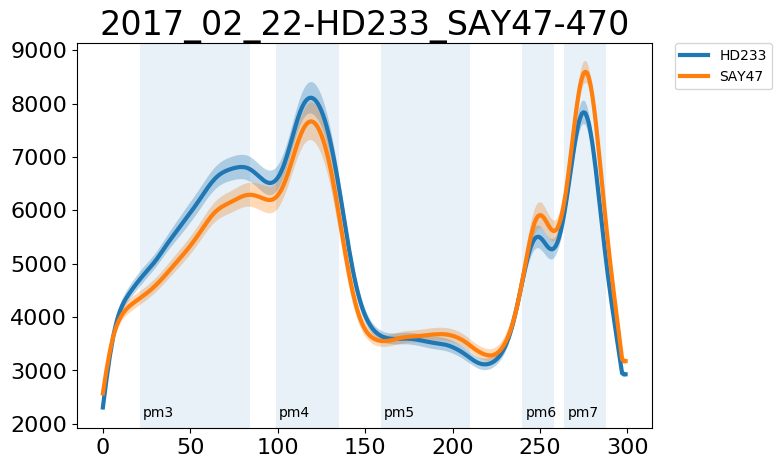

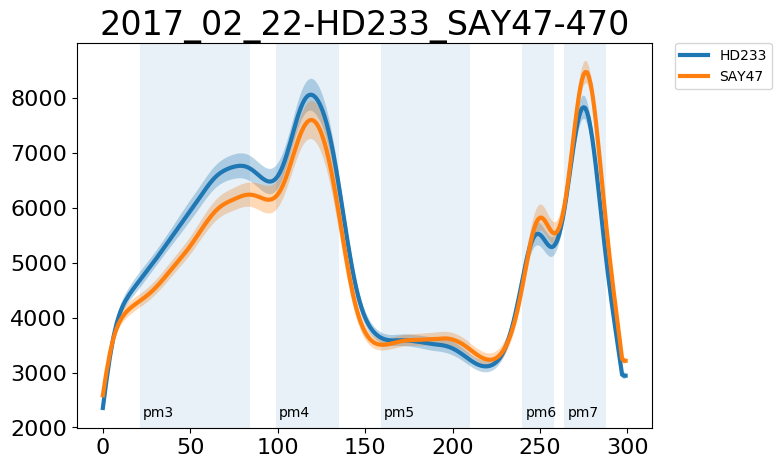

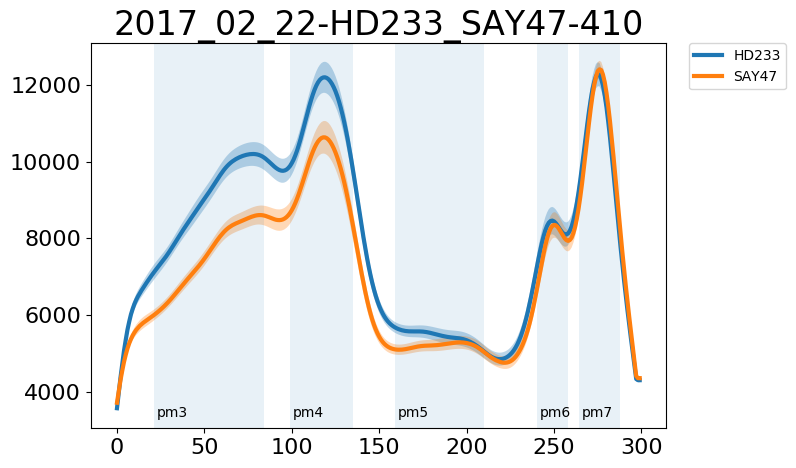

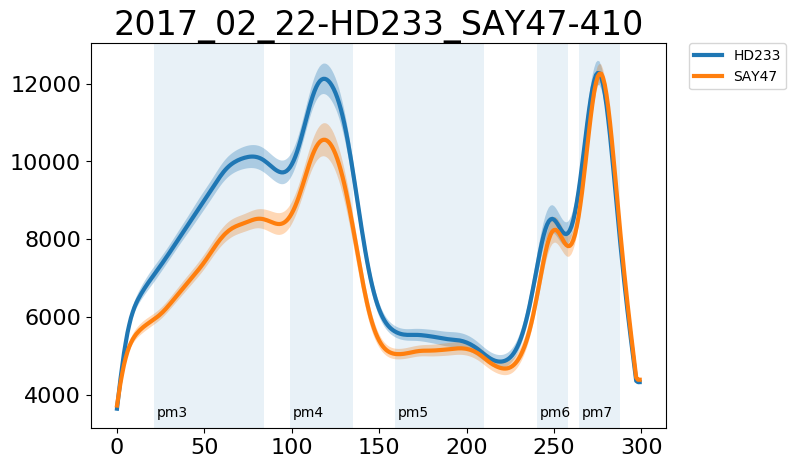

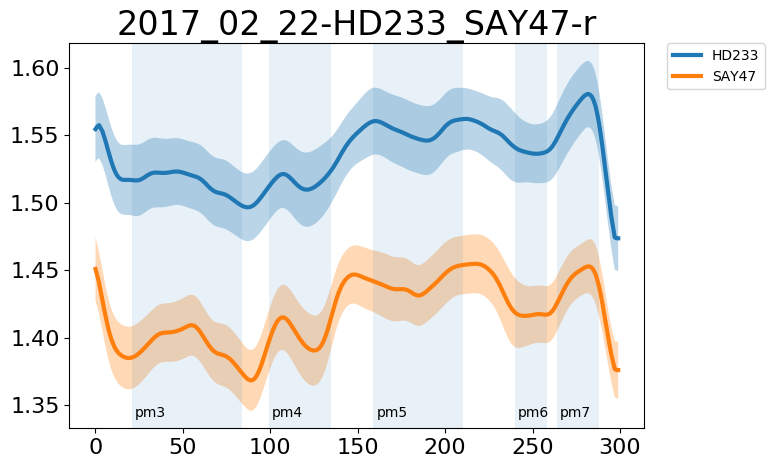

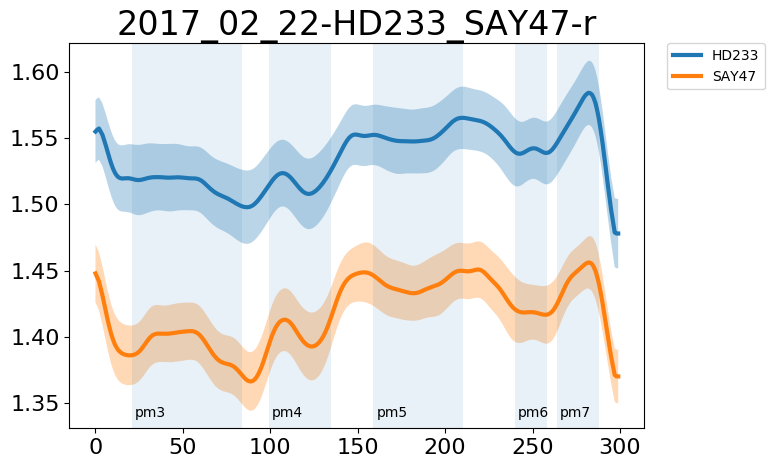

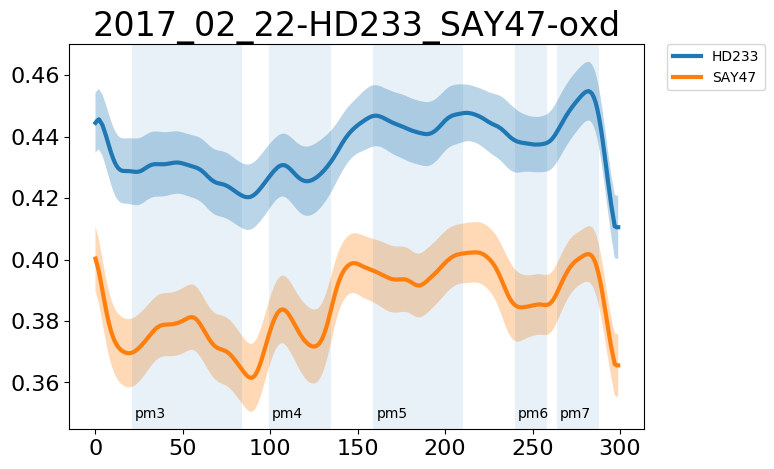

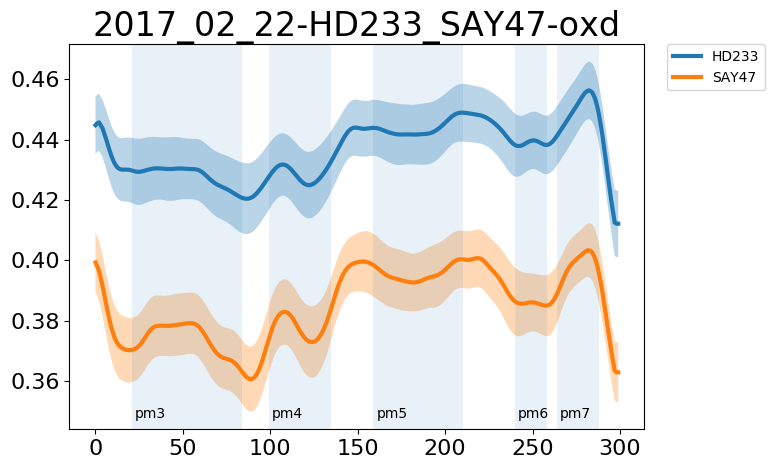

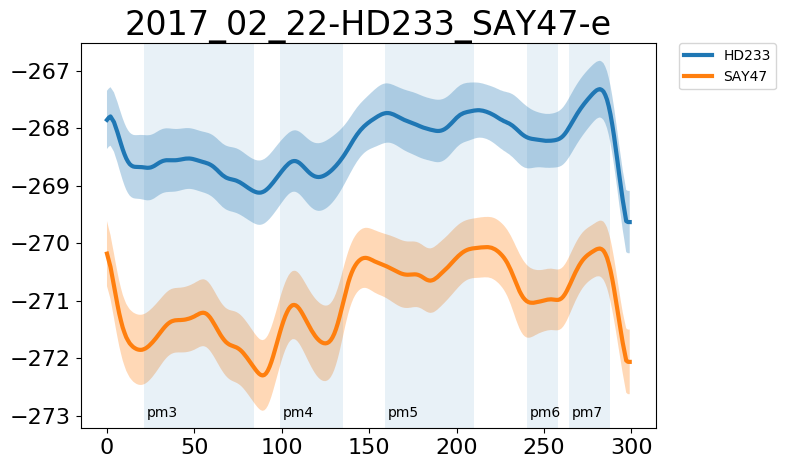

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

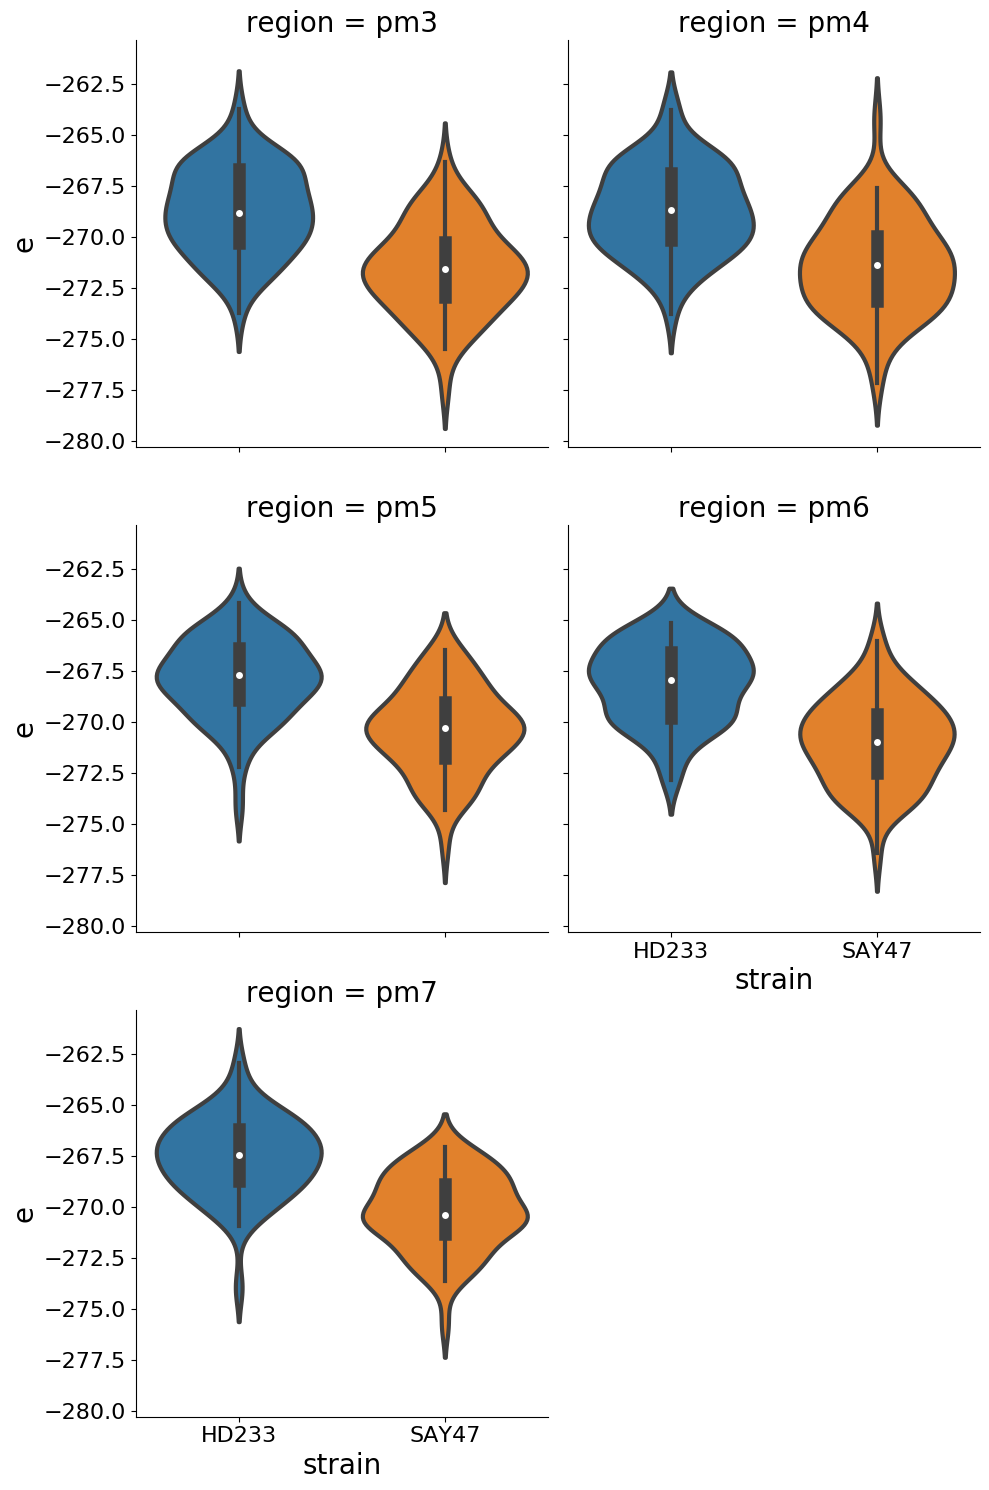

In [409]:
experiment_dir = "/Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47"
imaging_scheme = "TL/470/410/470/410"

ex_reg = experiment.PairExperiment(
    experiment_dir=experiment_dir,
    imaging_scheme=imaging_scheme,
    trim_threshold=4000,
    save_summary_plots=True,
    temperature=22.0,
    r_min=0.852,
    r_max=6.65,
    strategy='LAB-MEETING-REG',
    should_register=True
)
ex_reg.full_pipeline()

07:39:37 INFO:Starting full pipeline run for /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47
07:39:37 INFO:Loading Images
07:39:38 INFO:Segmenting pharynxes
07:39:39 INFO:Centering and rotating pharynxes
100%|██████████| 123/123 [00:07<00:00, 15.70it/s]
07:39:48 INFO:Calculating midlines
100%|██████████| 123/123 [00:01<00:00, 119.06it/s]
07:39:49 INFO:Measuring under midlines
100%|██████████| 123/123 [00:03<00:00, 32.49it/s]
07:39:53 INFO:Trimming intensity data
07:39:54 INFO:Calculating redox measurements
07:39:54 INFO:Saving 2017_02_22-HD233_SAY47 inside /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47
07:39:54 INFO:Saving region means to /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47/analyses/2019-08-13_LAB-MEETING_unreg/2017_02_22-HD233_SAY47-summary_table.csv
07:39:55 INFO:Saving profile data to /Users/sean/code/wormAnalysis/data/paired_ratio/2017_02_22-HD233_SAY47/analyses/2019-08-13_LAB-MEETING_unreg/2017_02_22

07:40:03 DEBUG:Embedding font /Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
07:40:03 DEBUG:Writing TrueType font.
07:40:03 DEBUG:Assigning font /b'F1' = '/Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
07:40:03 DEBUG:Embedding font /Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
07:40:03 DEBUG:Writing TrueType font.
07:40:04 DEBUG:Assigning font /b'F1' = '/Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
07:40:04 DEBUG:Embedding font /Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
07:40:04 DEBUG:Writing TrueType font.
07:40:04 DEBUG:Assigning font /b'F1' = '/Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/

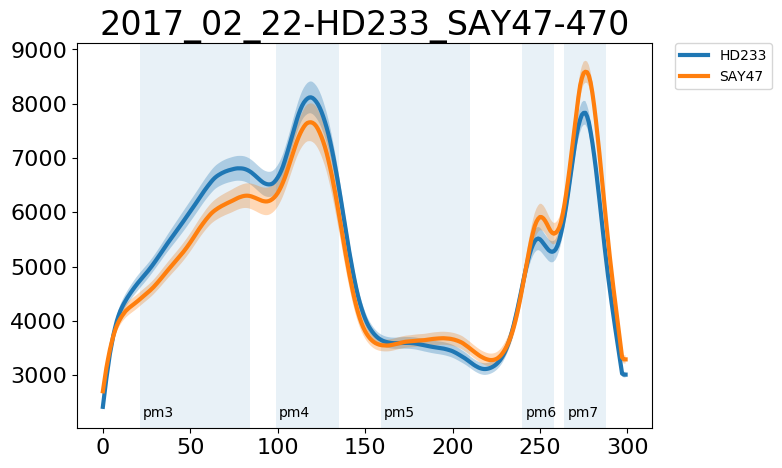

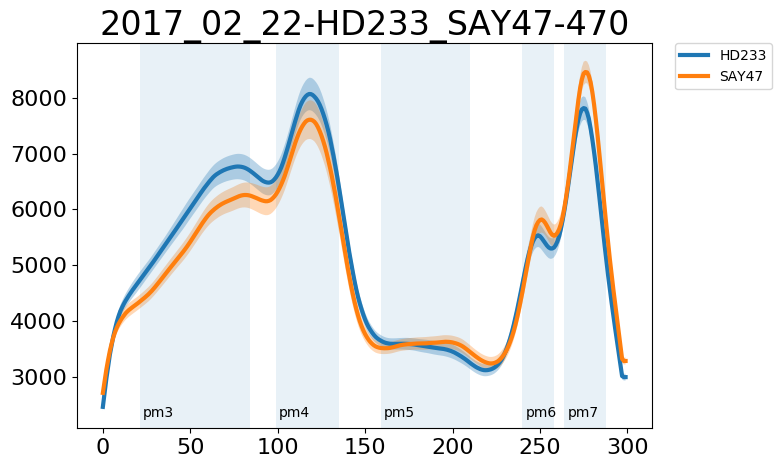

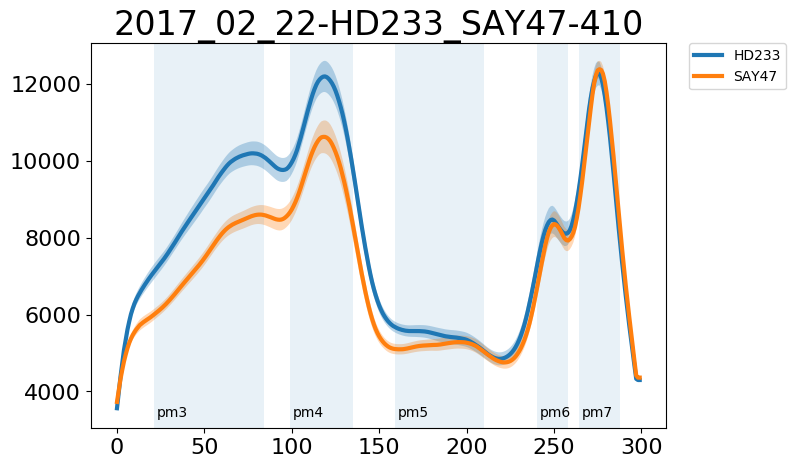

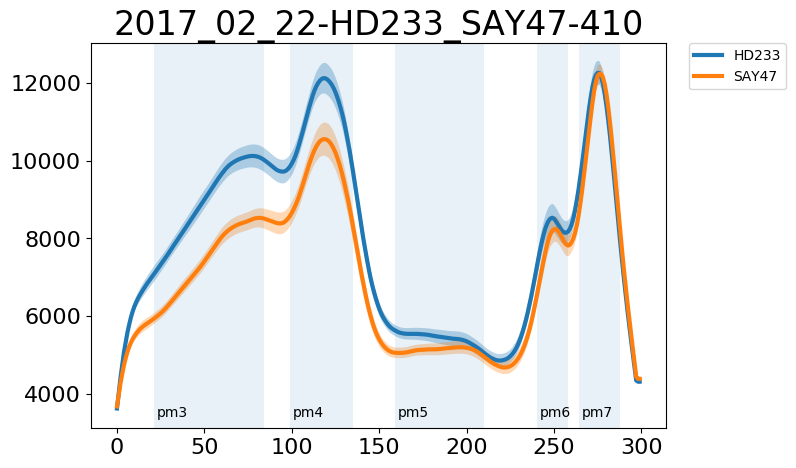

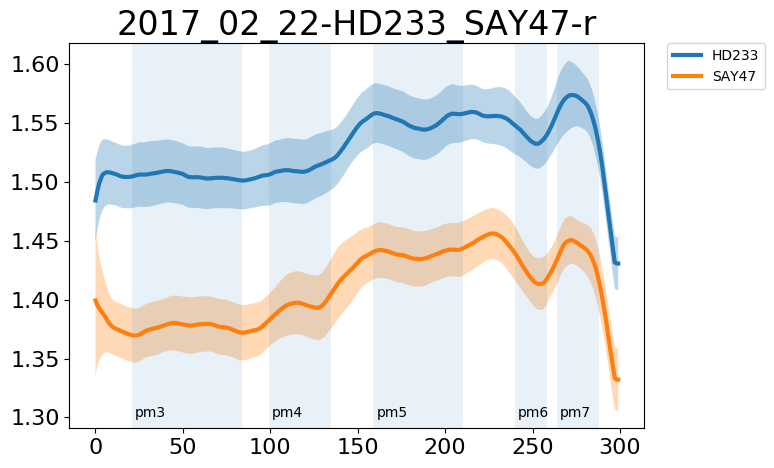

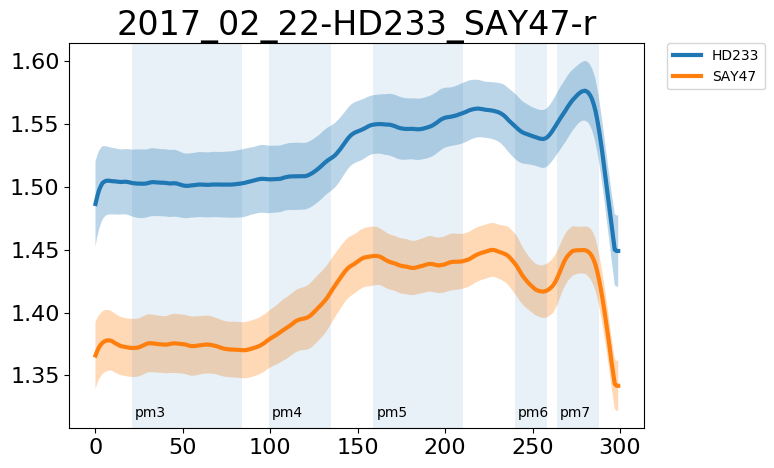

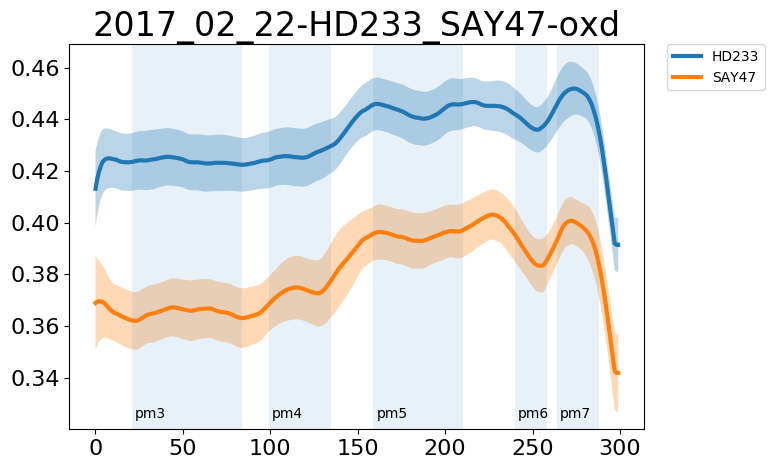

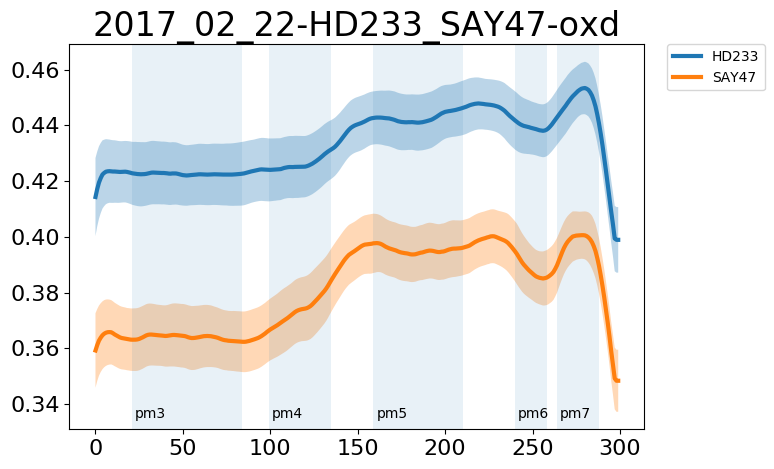

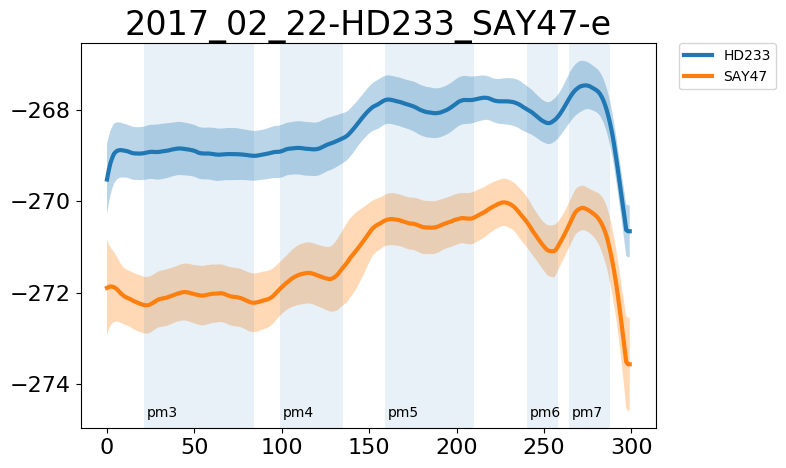

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

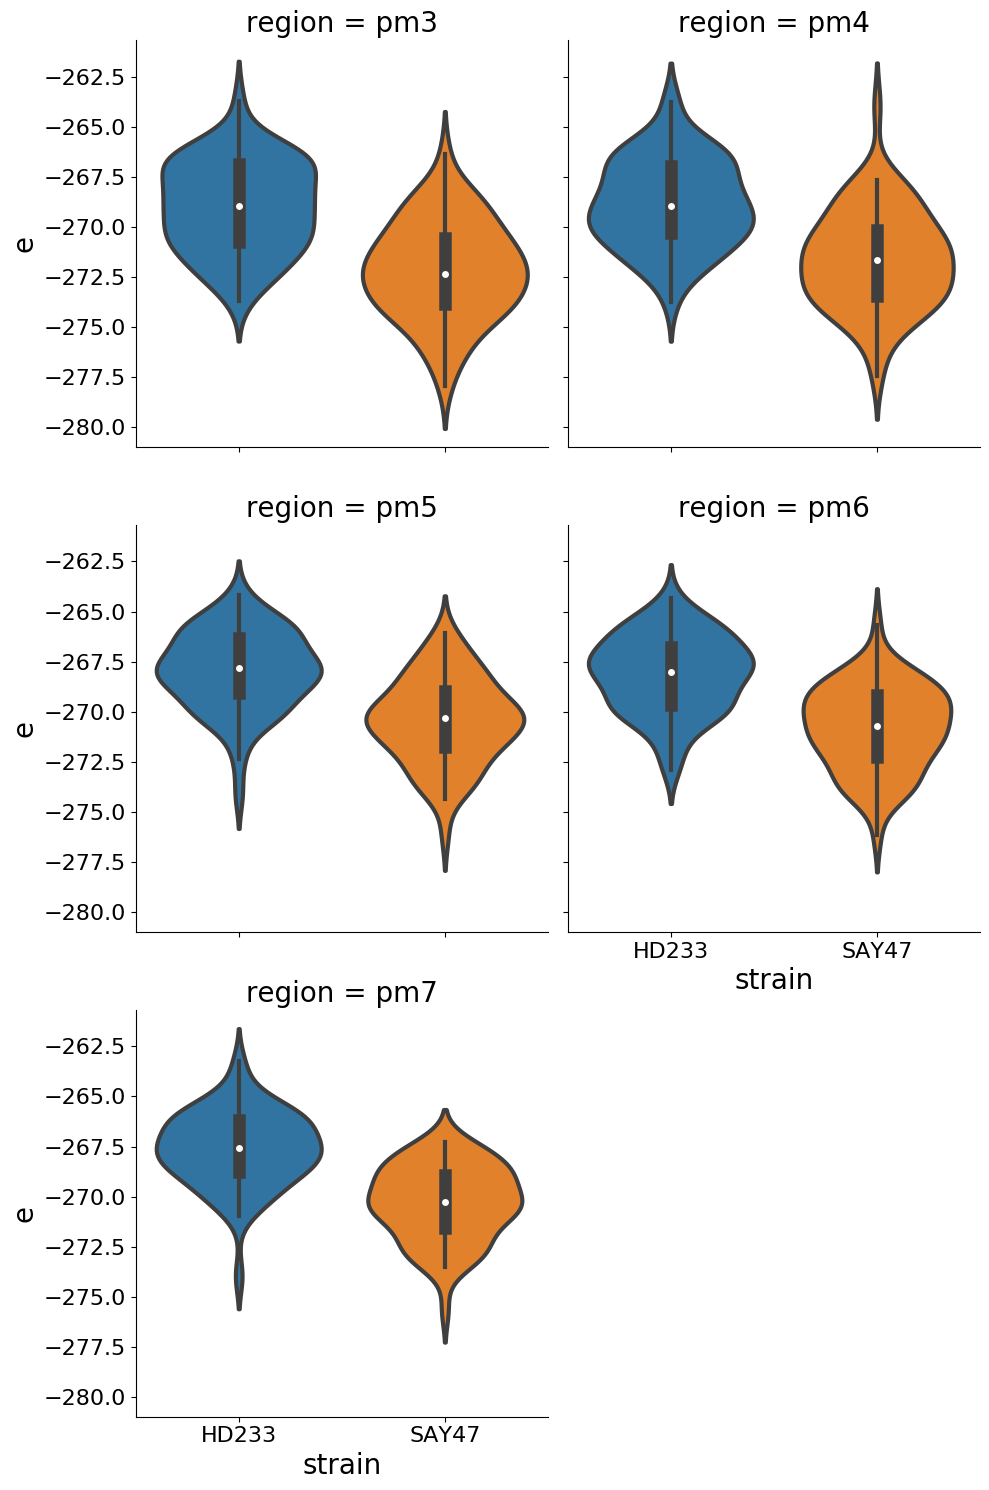

In [394]:
ex = experiment.PairExperiment(
    experiment_dir=experiment_dir,
    imaging_scheme=imaging_scheme,
    trim_threshold=4000,
    save_summary_plots=True,
    temperature=22.0,
    r_min=0.852,
    r_max=6.65,
    strategy='LAB-MEETING_unreg',
    should_register=False
)
ex.full_pipeline()

In [410]:
sc410 = scale(ex.untrimmed_profiles.sel(wavelength='410', pair=0), axis=1)
sc470 = scale(ex.untrimmed_profiles.sel(wavelength='470', pair=0), axis=1)

sc410_r = scale(ex_reg.untrimmed_profiles.sel(wavelength='410', pair=0), axis=1)
sc470_r = scale(ex_reg.untrimmed_profiles.sel(wavelength='470', pair=0), axis=1)

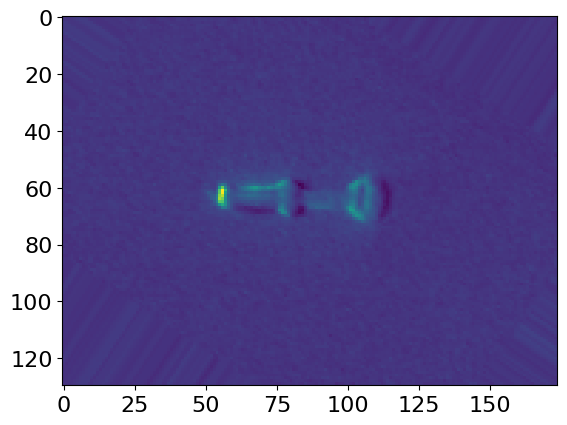

In [426]:
plt.imshow(ex.rot_fl.sel(wavelength='410', pair=0).isel(strain=i) / ex.rot_fl.sel(wavelength='470', pair=0).isel(strain=i))

119


07:54:55 DEBUG:Assigning font /b'F1' = '/Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
07:54:55 DEBUG:Embedding font /Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
07:54:55 DEBUG:Writing TrueType font.


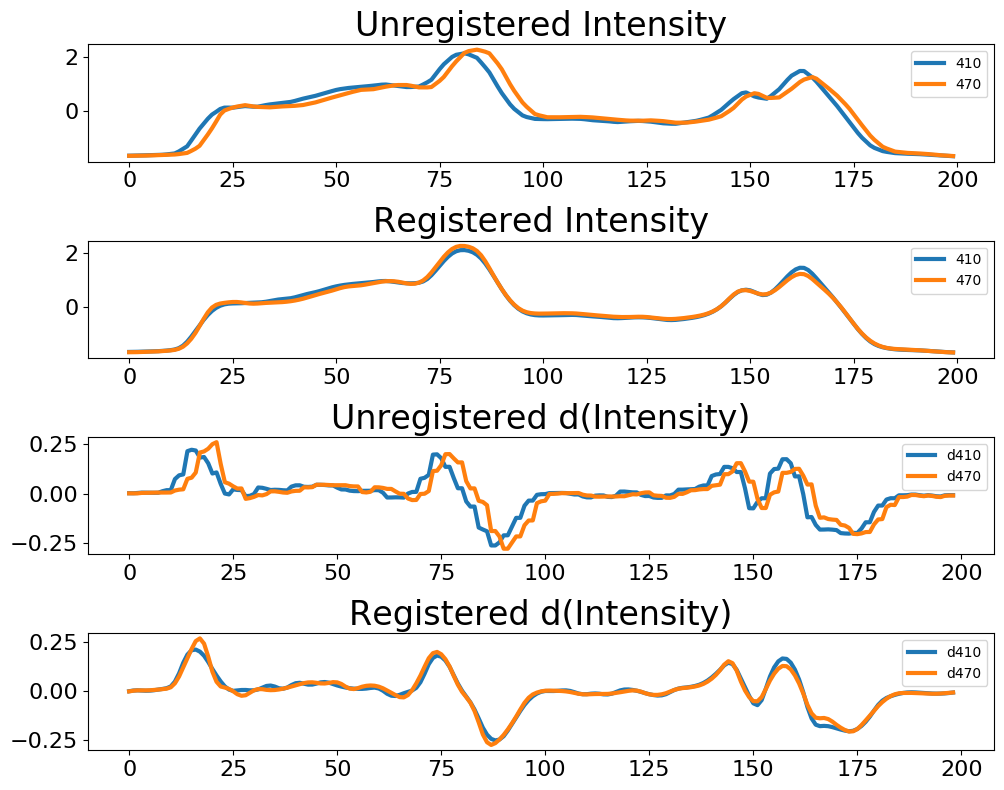

In [425]:
# i = i + 1
# i = 23
# i = 31
# i = 88
# i = 90
# i = 115
i = 119
print(i)
fig, axes = plt.subplots(4,1, figsize=(10,8));
# axes[0].imshow(ex.rot_fl.sel(wavelength='410', pair=0).isel(strain=i) / ex.rot_fl.sel(wavelength='470', pair=0).isel(strain=i))

ax = axes[0];
ax.plot(sc410[i], label='410');
ax.plot(sc470[i], label='470');
ax.legend();
ax.set_title('Unregistered Intensity');

ax = axes[2];
ax.plot(np.diff(sc410[i]), label='d410');
ax.plot(np.diff(sc470[i]), label='d470');
ax.legend();
ax.set_title('Unregistered d(Intensity)');

ax = axes[1];
ax.plot(sc410_r[i], label='410');
ax.plot(sc470_r[i], label='470');
ax.legend();
ax.set_title('Registered Intensity');

ax = axes[3];
ax.plot(np.diff(sc410_r[i]), label='d410');
ax.plot(np.diff(sc470_r[i]), label='d470');
ax.legend();
ax.set_title('Registered d(Intensity)');

plt.tight_layout();
plt.savefig('/Users/sean/Desktop/reg_v_unreg.pdf');

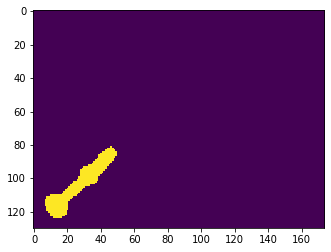

In [8]:
plt.imshow(ex.seg_images.sel(wavelength='410', pair=0).iselt(strain=0))

Polynomial([63.84700353,  1.63657096,  2.88588669, -3.17887733, -4.17309557], domain=[ 51., 120.], window=[-1.,  1.])

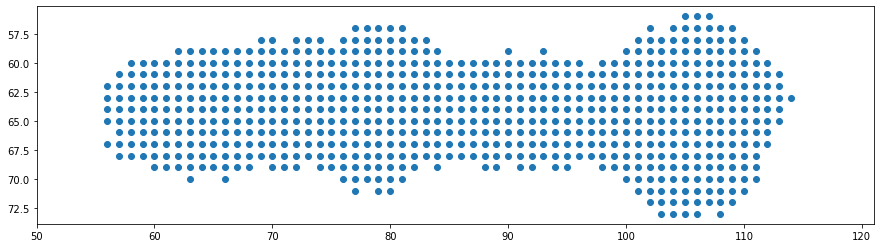

In [51]:
plt.figure(figsize=(15,4))

I = ex.rot_seg.sel(wavelength='410', pair=0).isel(strain=0)

rp = measure.regionprops(measure.label(I))[0]
xs, ys = rp.coords[:,1], rp.coords[:,0]

plt.scatter(xs, ys)
# plt.plot(*ex.midlines[0]['410'][0].linspace(), color='r')
plt.xlim(50,121)
plt.gca().invert_yaxis()
mid

(50, 79)

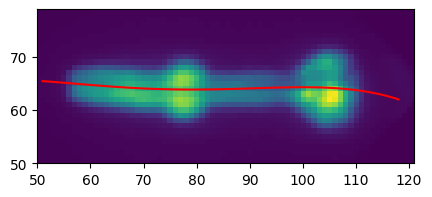

In [128]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize=(5,2))
plt.imshow(ex.rot_fl.sel(wavelength='410', pair=0).isel(strain=0))
mid = ex.midlines[0]['410'][0]
xs = np.arange(mid.domain[0], mid.domain[1])
plt.plot(*mid.linspace(), color='r')
plt.xlim(50,121)
plt.ylim(50,79)

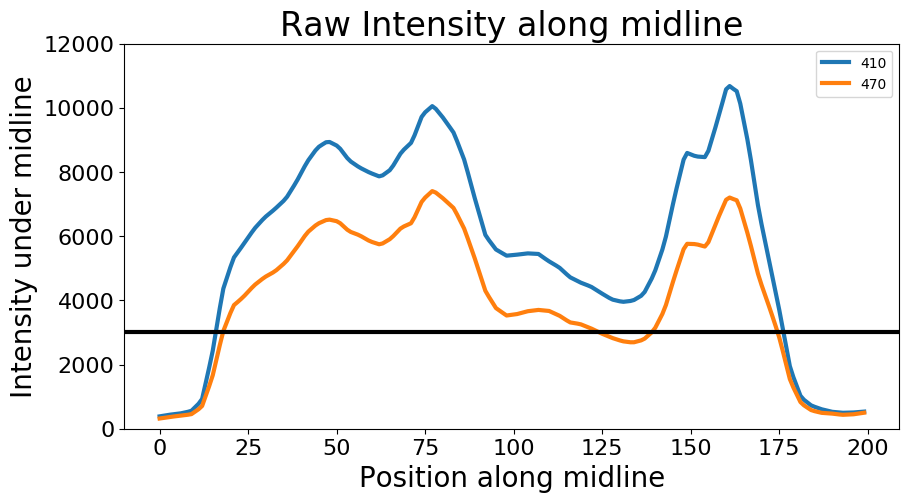

In [143]:

plt.style.use('presentation')
plt.figure(figsize=(10,5))
plt.plot(ex.untrimmed_profiles.sel(wavelength='410', pair=0).isel(strain=0), label='410')
plt.plot(ex.untrimmed_profiles.sel(wavelength='470', pair=0).isel(strain=0), label='470')
plt.legend()
plt.gca().set_title('Raw Intensity along midline')
plt.ylabel('Intensity under midline')
plt.xlabel('Position along midline')
plt.ylim(0,12000)
plt.axhline(3000, color='k')

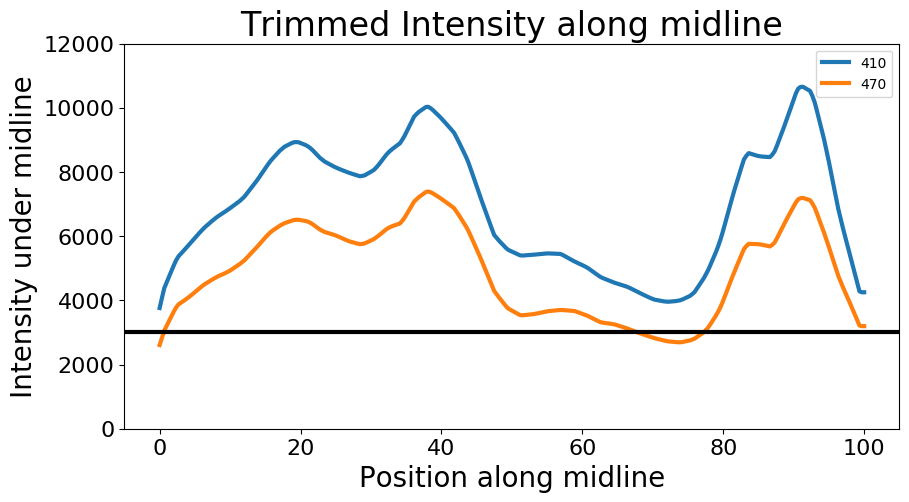

In [142]:
plt.style.use('presentation')
plt.figure(figsize=(10,5))

xs = np.linspace(0,100,300)
plt.ylim(0,12000)
plt.plot(xs,ex.trimmed_profiles.sel(wavelength='410', pair=0).isel(strain=0), label='410')
plt.plot(xs,ex.trimmed_profiles.sel(wavelength='470', pair=0).isel(strain=0), label='470')

# plt.gca().set_title(ex.trimmed_profiles.strain[0].values)
plt.gca().set_title('Trimmed Intensity along midline')
plt.legend()
plt.ylabel('Intensity under midline')
plt.xlabel('Position along midline')
plt.axhline(3000, color='k')

04:05:10 DEBUG:Assigning font /b'F1' = '/Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
04:05:11 DEBUG:Embedding font /Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
04:05:11 DEBUG:Writing TrueType font.


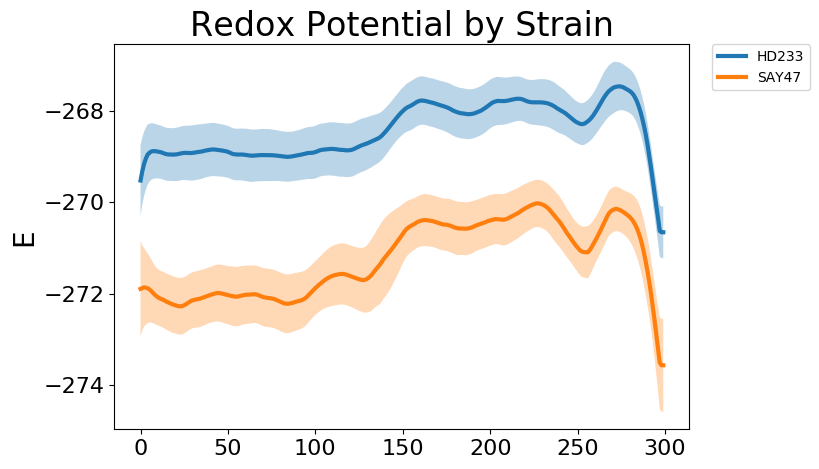

In [218]:
fig, ax = plots.plot_profile_avg_by_strain(ex.trimmed_profiles.sel(wavelength='e', pair=0))
ax.set_title('Redox Potential by Strain');
ax.set_ylabel('E');
plt.savefig('/Users/sean/Desktop/redox.pdf')

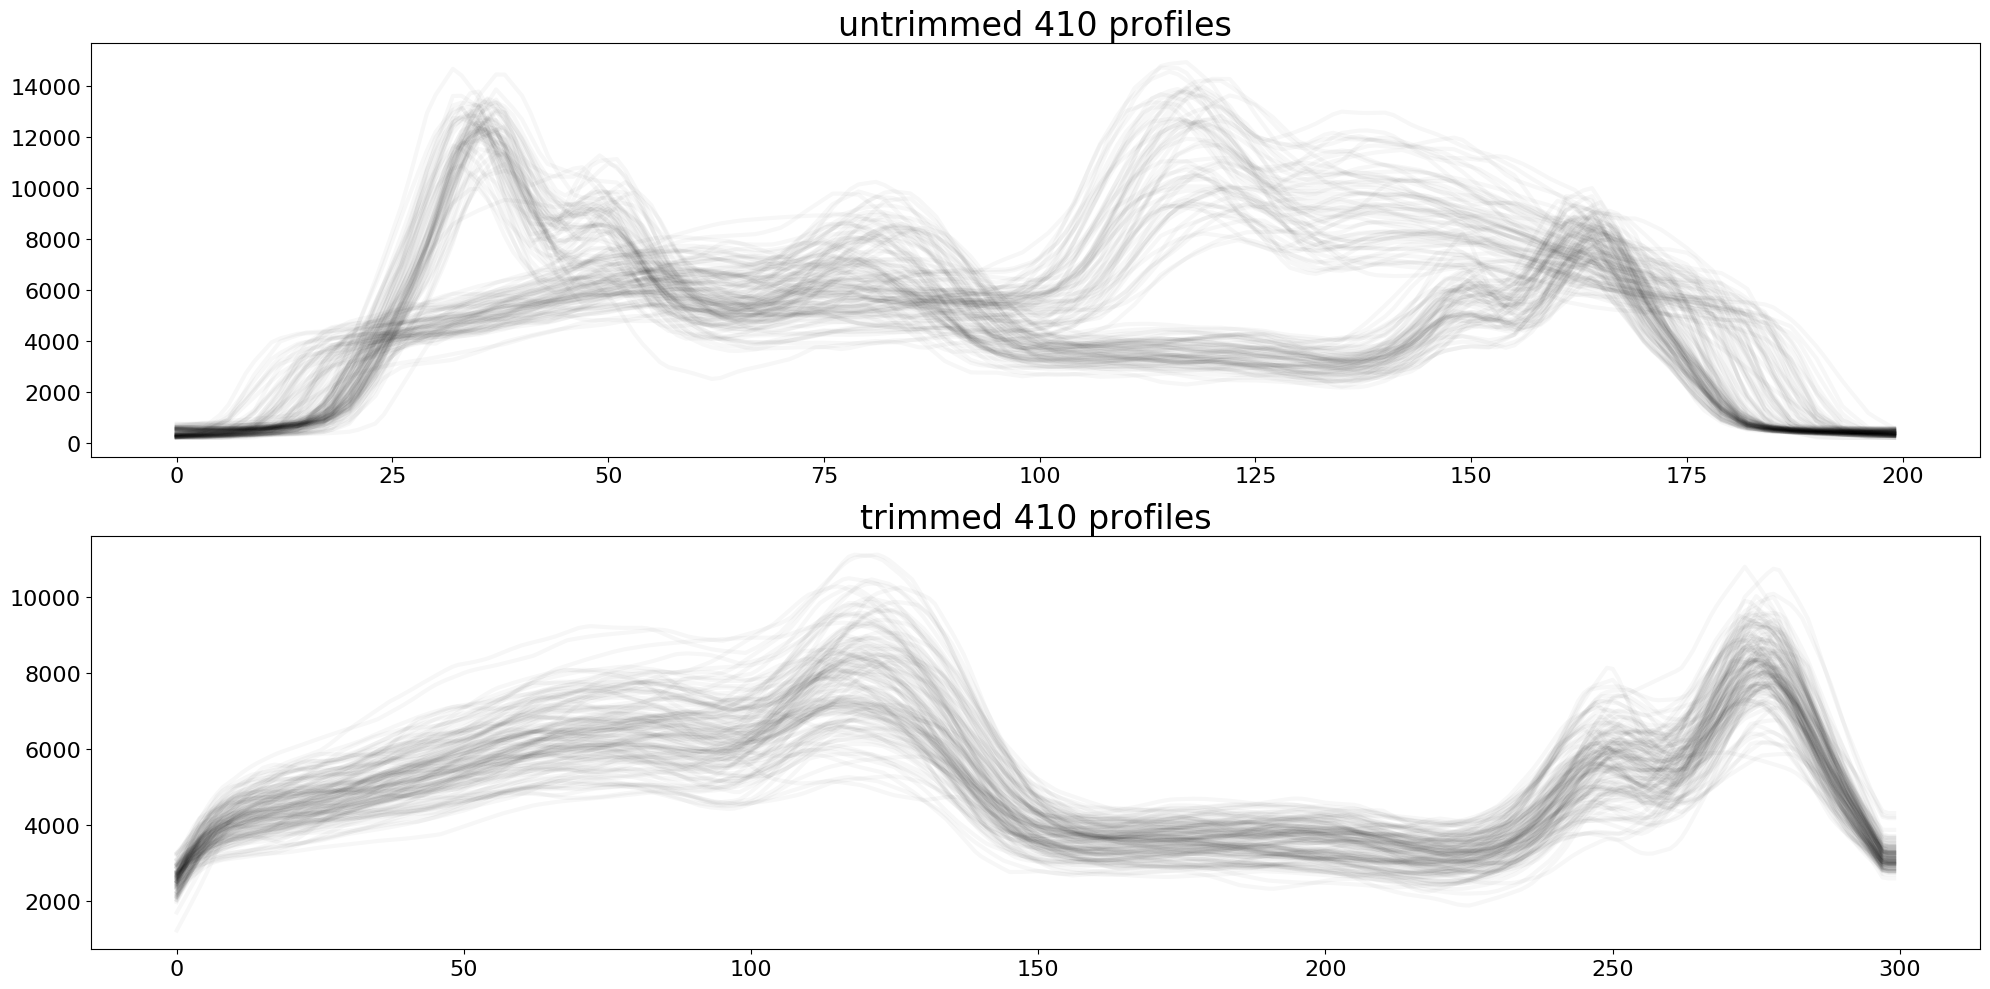

In [204]:
fig, axes = plt.subplots(2,1,figsize=(20,10))
axes[0].plot(flipped_random.sel(wavelength='470', pair=0).T, color='k', alpha=.03);
axes[0].set_title('untrimmed 410 profiles')
axes[1].plot(ex.trimmed_profiles.sel(wavelength='470', pair=0).T, color='k', alpha=.03);
axes[1].set_title('trimmed 410 profiles')
plt.tight_layout()

In [197]:
flipped_random = ex.untrimmed_profiles
for i in range(ex.untrimmed_profiles.strain.size):
    if np.random.random() > 0.5:
        flipped_random.values[i] = np.flip(flipped_random.values[i])

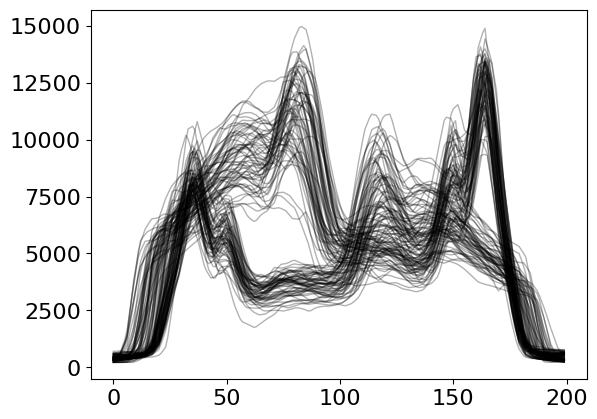

In [222]:
plt.plot(flipped_random.sel(wavelength='410', pair=0).T, color='k', alpha=.3, linewidth=1);

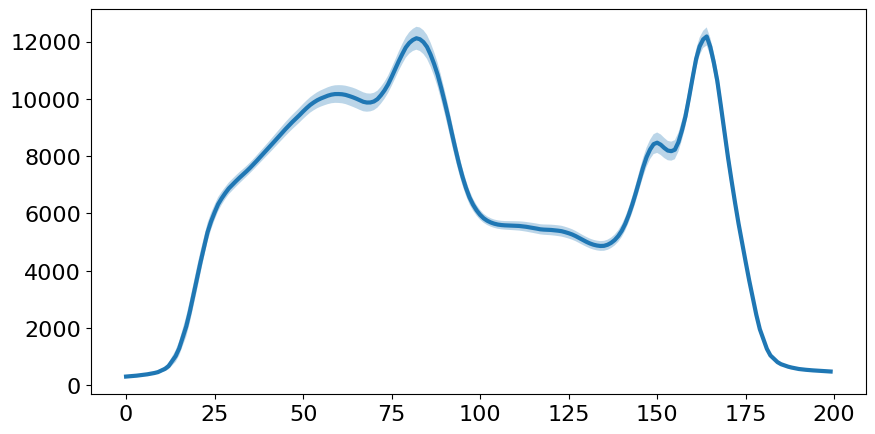

In [172]:
fig, ax = plt.subplots(figsize=(10,5))
plots.plot_profile_avg_with_bounds(ex.untrimmed_profiles.sel(wavelength='410', pair=0, strain='HD233'), ax=ax)
# plots.plot_profile_avg_with_bounds(ex.trimmed_profiles.sel(wavelength='410', pair=0, strain='HD233'), ax=ax)

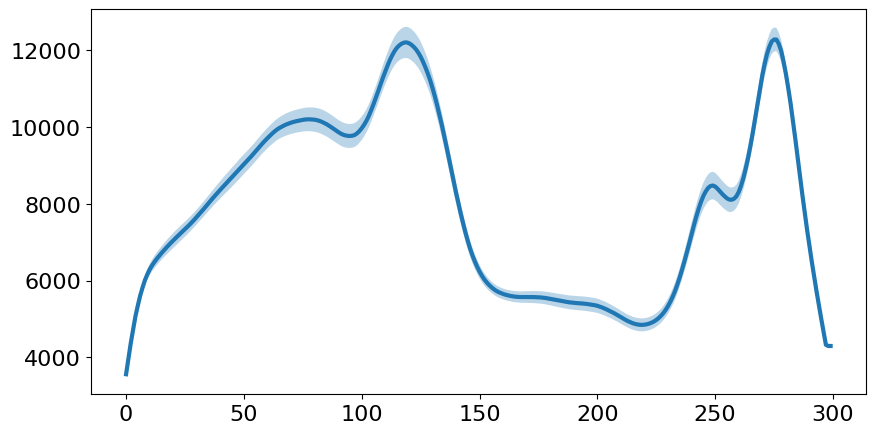

In [173]:
fig, ax = plt.subplots(figsize=(10,5))
# plots.plot_profile_avg_with_bounds(ex.untrimmed_profiles.sel(wavelength='410', pair=0, strain='HD233'), ax=ax)
plots.plot_profile_avg_with_bounds(ex.trimmed_profiles.sel(wavelength='410', pair=0, strain='HD233'), ax=ax)

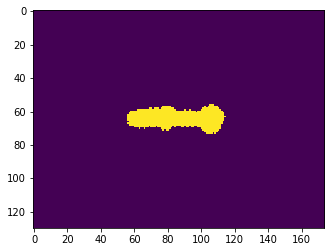

In [32]:
plt.imshow(ex.rot_seg.sel(wavelength='410', pair=0).isel(strain=0))

In [233]:
ex.summary_table.sample(5)

,animal,strain,region,experiment,strategy,pair,470,410,r,oxd,e,anterior,posterior,sides_of_tip,tip
8,8,HD233,pm7,2017_02_22-HD233_SAY47,LAB-MEETING,0,8263.292831,11627.363540,1.405327,0.380969,-271.186806,0,0,0,1
41,41,HD233,pm6,2017_02_22-HD233_SAY47,LAB-MEETING,0,5858.510313,8489.621937,1.450272,0.402164,-270.042730,0,0,0,0
22,22,HD233,pm5,2017_02_22-HD233_SAY47,LAB-MEETING,0,4112.876757,5880.934497,1.429721,0.392882,-270.535082,0,0,1,0
131,8,HD233,pm4,2017_02_22-HD233_SAY47,LAB-MEETING,1,8406.904998,12021.164841,1.429190,0.392620,-270.549408,0,0,2,1
186,63,SAY47,pm5,2017_02_22-HD233_SAY47,LAB-MEETING,1,3660.448243,5604.673404,1.531356,0.436963,-268.223926,0,0,0,0


In [228]:
ex.trimmed_profiles

<xarray.DataArray (strain: 123, wavelength: 5, pair: 2, position: 300)>
array([[[[2608.01468 , ..., 3196.658997],
         [2689.741092, ..., 3074.302081]],

        ...,

        [[-270.226615, ..., -273.172661],
         [-271.347379, ..., -271.217752]]],


       ...,


       [[[2735.111139, ..., 3243.755473],
         [2777.441579, ..., 3051.734247]],

        ...,

        [[-270.349253, ..., -274.769081],
         [-271.389961, ..., -273.12394 ]]]])
Coordinates:
  * wavelength  (wavelength) object '470' '410' 'r' 'oxd' 'e'
  * strain      (strain) object 'HD233' 'HD233' 'HD233' ... 'SAY47' 'SAY47'
  * pair        (pair) int64 0 1
Dimensions without coordinates: position
Attributes:
    r_min:               0.852
    r_max:               6.65
    instrument_factor:   0.171
    midpoint_potential:  -265.0
    z:                   2
    temperature:         22.0
    strategy:            LAB-MEETING

(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120a752b0>)

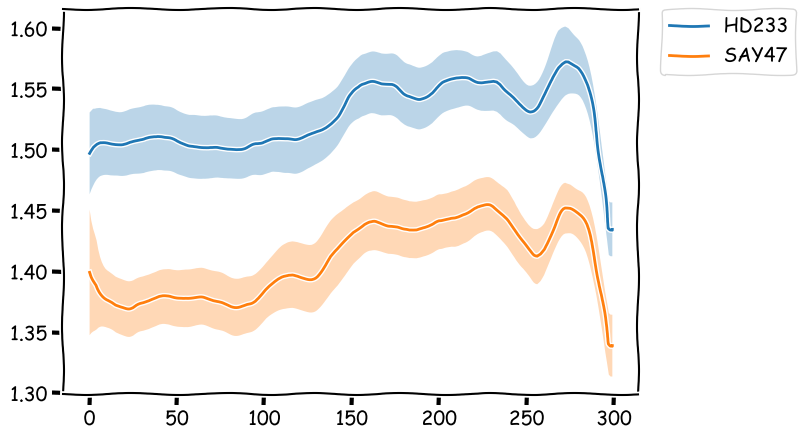

In [92]:
plt.xkcd()
plots.plot_profile_avg_by_strain(ex.trimmed_profiles.sel(wavelength='r', pair=0))

In [288]:
reg_profile_data = profile_processing.register_profiles(ex.raw_profiles, warp_lambda=1e4)

In [30]:
ex.summary_table['total'] =ex.summary_table.anterior + ex.summary_table.posterior + ex.summary_table.sides_of_tip + ex.summary_table.tip

In [42]:
non_movers = ex.summary_table[(ex.summary_table.total == 0) & (ex.summary_table.pair==0) & (ex.summary_table.strategy=='reg')& (ex.summary_table.region=='pm7')].animal
movers = ex.summary_table[(ex.summary_table.total > 0) & (ex.summary_table.pair==0) & (ex.summary_table.strategy=='reg')& (ex.summary_table.region=='pm7')].animal

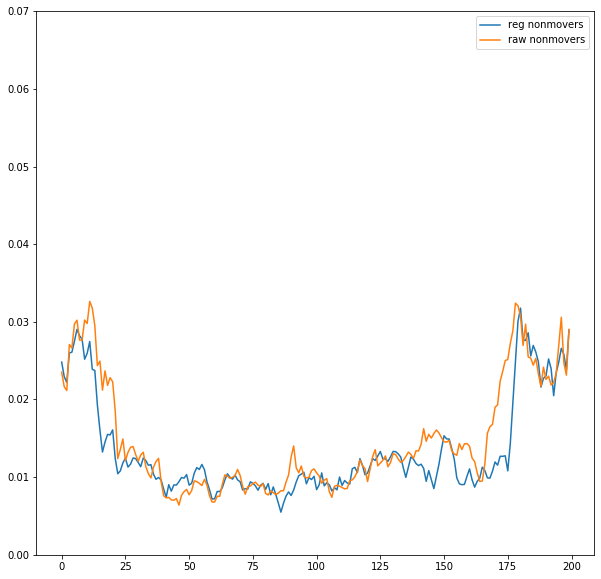

In [49]:
plt.figure(figsize=(10,10))
rr = (ex.reg_profiles.sel(wavelength='410', pair=0) / ex.reg_profiles.sel(wavelength='470', pair=0)) / (ex.reg_profiles.sel(wavelength='410', pair=1) / ex.reg_profiles.sel(wavelength='470', pair=1))
plt.plot(np.median(np.abs(1-rr[non_movers.values]), axis=0), label='reg nonmovers')

rr = (ex.raw_profiles.sel(wavelength='410', pair=0) / ex.raw_profiles.sel(wavelength='470', pair=0)) / (ex.raw_profiles.sel(wavelength='410', pair=1) / ex.raw_profiles.sel(wavelength='470', pair=1))
plt.plot(np.median(np.abs(1-rr[non_movers.values]), axis=0), label='raw nonmovers')
plt.ylim([0, .07])
plt.legend()

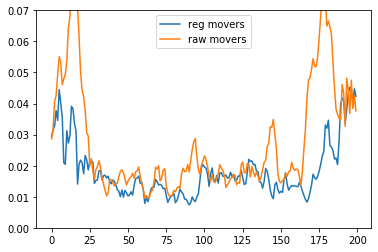

In [55]:
rr = (ex.reg_profiles.sel(wavelength='410', pair=0) / ex.reg_profiles.sel(wavelength='470', pair=0)) / (ex.reg_profiles.sel(wavelength='410', pair=1) / ex.reg_profiles.sel(wavelength='470', pair=1))
plt.plot(np.median(np.abs(1-rr[movers.values]), axis=0), label='reg movers')

rr = (ex.raw_profiles.sel(wavelength='410', pair=0) / ex.raw_profiles.sel(wavelength='470', pair=0)) / (ex.raw_profiles.sel(wavelength='410', pair=1) / ex.raw_profiles.sel(wavelength='470', pair=1))
plt.plot(np.median(np.abs(1-rr[movers.values]), axis=0), label='raw movers')
plt.ylim([0, .07])
plt.legend()

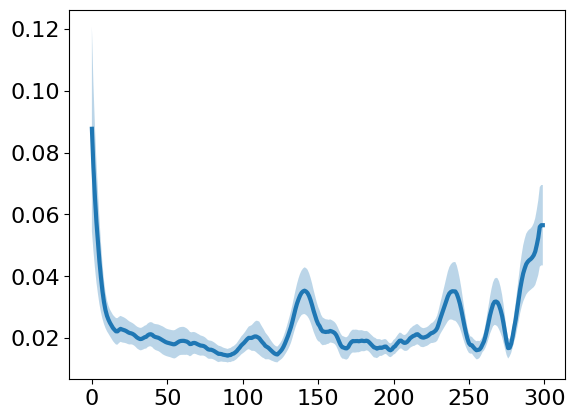

In [428]:
plots.plot_profile_avg_with_bounds(np.abs(ex.trimmed_profiles.sel(pair=0, wavelength='r') - ex.trimmed_profiles.sel(pair=1, wavelength='r')));

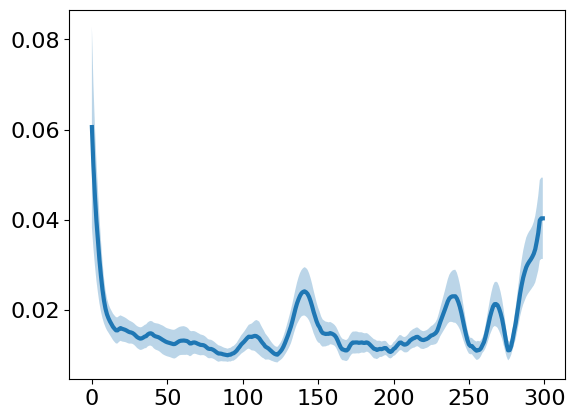

In [435]:
ax = plots.plot_profile_avg_with_bounds(np.abs(1 - (ex.trimmed_profiles.sel(pair=0, wavelength='r') / ex.trimmed_profiles.sel(pair=1, wavelength='r'))))
# ax.set_title('Error')
# plots.add_regions_to_axis(ax, ex.scaled_regions)